In [1]:
library(tidyverse)
library(repr)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Project Planning Stage

# Data Description

The datasets utilized for this project are `players.csv` and `sessions.csv`

#### `Players.csv` is a data frame with 7 columns and 196 rows containing player information:

* `experience (chr)`: whether a particular player is a pro, veteran, amateur, or regular, or pro
  
* `subscribe (lgl)`: whether the player is subscribed to a game-related newsletter

* `hashedEmail (chr)`: a unique identifier for each player

* `played_hours (dbl)`: total number of hours played

* `name (chr)`: the player name

* `gender (chr)`: the player gender

* `Age (dbl)`: the player age
  
  
#### `Sessions.csv` is a data frame with 5 columns and 1535 rows containing session-specific information: 

* `hashedEmail (chr)`: a unique identifier for each player
  
* `start_time (chr)`: the start time of a session in the format day/month/year hour:minute

*  `end_time (chr)`: the end time of a session in the format day/month/year hour:minute

*  `original_start_time (dbl)`: the start of a session in the Unix timestamp format

*  `original_end_time (dbl)`: the end of a session in the Unix timestamp format

#### Data Summary
* `subscribe` has of 52 subscribers (`TRUE`) and 144 non-subscribers (`FALSE`)
* `played_hours`
    * Maximum - 223.1 hours
    * Minimum - 0 hours
    * Average - 5.845918 Hours 
* `Age`
    * Oldest age - 50 years
    * Youngest age - 8 years
    * Mean age - 20.52 years

#### Dataset Issues
* Poor data quality: some columns contain `NA` values and falsely reported player experience/age is a potential issue
* Data is very male-dominated (`124 males:37 females`)
* Player experience classifiers (`Beginner`, `Amateur`, etc.) are not explained

# Questions
#### Broad Question
We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 

#### Specific Question
Can we infer for university students ages 18-22, which month, week, and time of day will have the the greatest player traffic?


In [2]:
players_url <- "https://raw.githubusercontent.com/klam42/project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/klam42/project/refs/heads/main/sessions.csv"

players <- read_csv(players_url)
sessions <- read_csv(sessions_url)
players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [6]:
players_experience_summary <- players |> # summary of experience
    group_by(experience) |>
    summarise(count = n())
# players_experience_summary

players_subs_summary <- players |> # summary of subscriptions
    group_by(subscribe) |>
    summarise(count = n())
# players_subs_summary

players_gender_summary <- players |> # summary of gender
    group_by(gender) |>
    summarise(count = n())
# players_gender_summary

players_hours_summary <- players |> # summary of hours played
    summarise(played_hours = mean(played_hours))
# players_hours_summary

players_age_summary <- players |> # summary of age
    summarize(Age = max(Age, na.rm = TRUE))
# players_age_summary

In [11]:
options(repr.plot.width = 10, repr.plot.height = 7)

uni_student <- players |> #Selects for university students aged 18-22
    select(hashedEmail, Age) |>
    filter(Age <= 22 & Age>= 18)

uni_student_vector <- pull(uni_student, hashedEmail) #Puts the hashedEmails of university students into a vector

uni_student_sessions <- sessions |> #Filters university students using the hashedEmail vector and splits the start time into separate columns
    select(hashedEmail:start_time) |>
    filter(hashedEmail %in% uni_student_vector) |>
    separate(col = start_time, into = c("day", "month", "year"), sep = "/")|>
    separate(col = year, into = c("year", "time"), sep = " ") |>
    separate(col = time, into = c("hour", "minute"), sep = ":")

uni_student_sessions

hashedEmail,day,month,year,hour,minute
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21,09,2024,02,13
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,18,08,2024,00,51
24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,23,05,2024,18,12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,30,05,2024,06,11
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,26,07,2024,23,09
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,30,06,2024,16,21
24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,16,05,2024,04,03
24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,12,05,2024,15,54
24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,11,05,2024,15,41


In [12]:
sessions_per_month = uni_student_sessions |> #Calculates the total number of sessions per month
    select(hashedEmail, day, month)|>
    mutate(month = as_factor(month)) |>
    group_by(month) |>
    summarize(count = n())|>
    mutate(month =  fct_recode(month, 
                    "April" = "04",
                    "May" = "05",
                    "June" = "06",
                    "July" = "07",
                    "August" = "08",
                    "September" = "09"))
sessions_per_month

month,count
<fct>,<int>
September,39
August,74
May,58
July,76
June,87
April,36


#### The table depicts the total number of sessions played per month

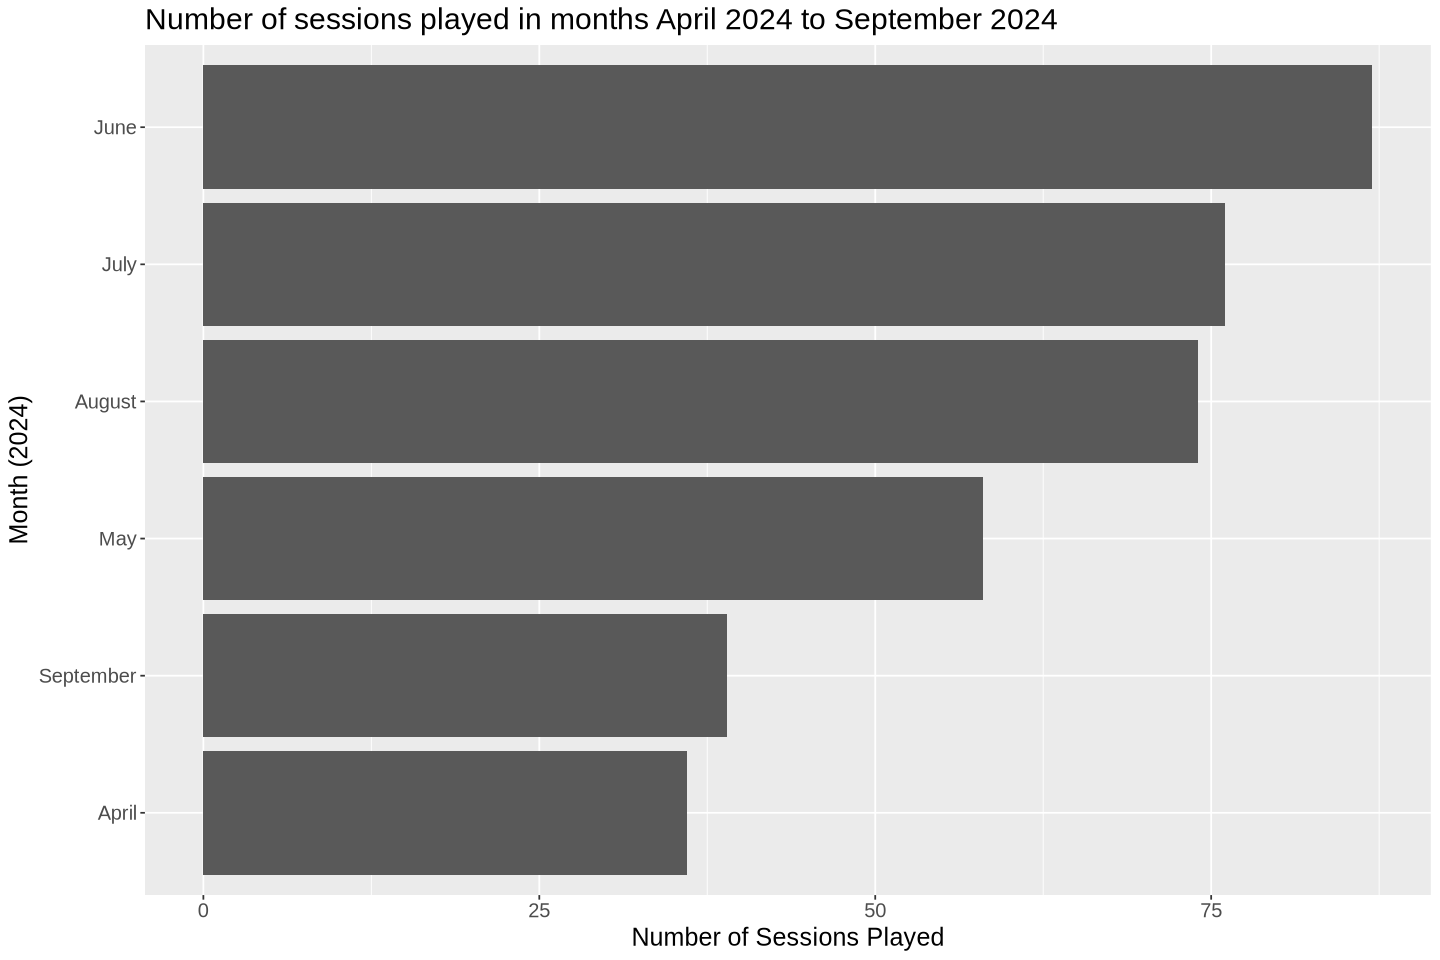

In [34]:
options(repr.plot.width = 12, repr.plot.height = 8)

monthly_sessions <- sessions_per_month |> #Graphs the number of sessions per month
    ggplot(aes(x = count, y = fct_reorder(month, count))) +
    geom_bar(stat = "identity") +
    labs(x = "Number of Sessions Played", y = "Month (2024)") +
    ggtitle("Number of sessions played in months April 2024 to September 2024 ") +
    theme(text = element_text(size = 15))
    
monthly_sessions

#### The graph shows that June had the highest number of sessions played by university students between April and September.

In [26]:
june_sessions <- uni_student_sessions |> #Filters for sessions in June
    select(hashedEmail, day, month, hour) |>
    filter(month == "06") |>
    mutate(day = as.numeric(day))|>
    mutate(hour = as.numeric(hour))

work_hours <- c(09, 10, 11, 12, 13, 14, 15, 16, 17) #vector for work hours
study_hours <- c(18, 19, 20, 21, 22, 23, 0) #vector for study hours
sleep_hours <- c(01, 02, 03, 04, 05, 06, 07, 08) #vector for sleep hours
week_1 <- c(1:8) #vector for days in the first week of June
week_2 <- c(9:15) #vector for days in the second week of June
week_3 <- c(16:22) #vector for days in the third week of June
week_4 <- c(23:30) #vector for days in the fourth week of June


sessions_per_hour <- june_sessions |> #Determines what time of day and week a session occurred
        group_by(day, hour) |>
        summarize(count = n(), .groups = "drop") |>
        mutate(time_of_day = case_when(
            hour %in% work_hours ~ "work_hours",
            hour %in% study_hours ~ "study_hours",
            hour %in% sleep_hours ~ "sleep_hours" )) |>
        mutate(week = case_when(
            day %in% week_1 ~ "Week 1",
            day %in% week_2 ~ "Week 2",
            day %in% week_3 ~ "Week 3",
            day %in% week_4 ~ "Week 4")) 

sessions_per_hour

day,hour,count,time_of_day,week
<dbl>,<dbl>,<int>,<chr>,<chr>
3,0,1,study_hours,Week 1
3,23,1,study_hours,Week 1
4,7,1,sleep_hours,Week 1
5,1,2,sleep_hours,Week 1
5,2,2,sleep_hours,Week 1
5,3,1,sleep_hours,Week 1
5,19,1,study_hours,Week 1
6,6,1,sleep_hours,Week 1
7,1,1,sleep_hours,Week 1


In [28]:
total_daily_sessions <- june_sessions |> #Summarizes the total number of sessions per day in June
        group_by(day) |>
        summarize(count = n())

total_daily_sessions 

day,count
<dbl>,<int>
3,2
4,1
5,6
6,1
7,1
8,3
10,1
11,2
12,4


#### This table shows the total number of sessions per day in June

In [29]:
total_weekly_sessions <- sessions_per_hour |> #Summarizes the total number of sessions per week
        mutate(week = as_factor(week))|>
        group_by(week) |>
        summarize(total_count = sum(count))

total_weekly_sessions 

week,total_count
<fct>,<int>
Week 1,14
Week 2,19
Week 3,27
Week 4,27


#### This table shows the total number of sessions per week in June

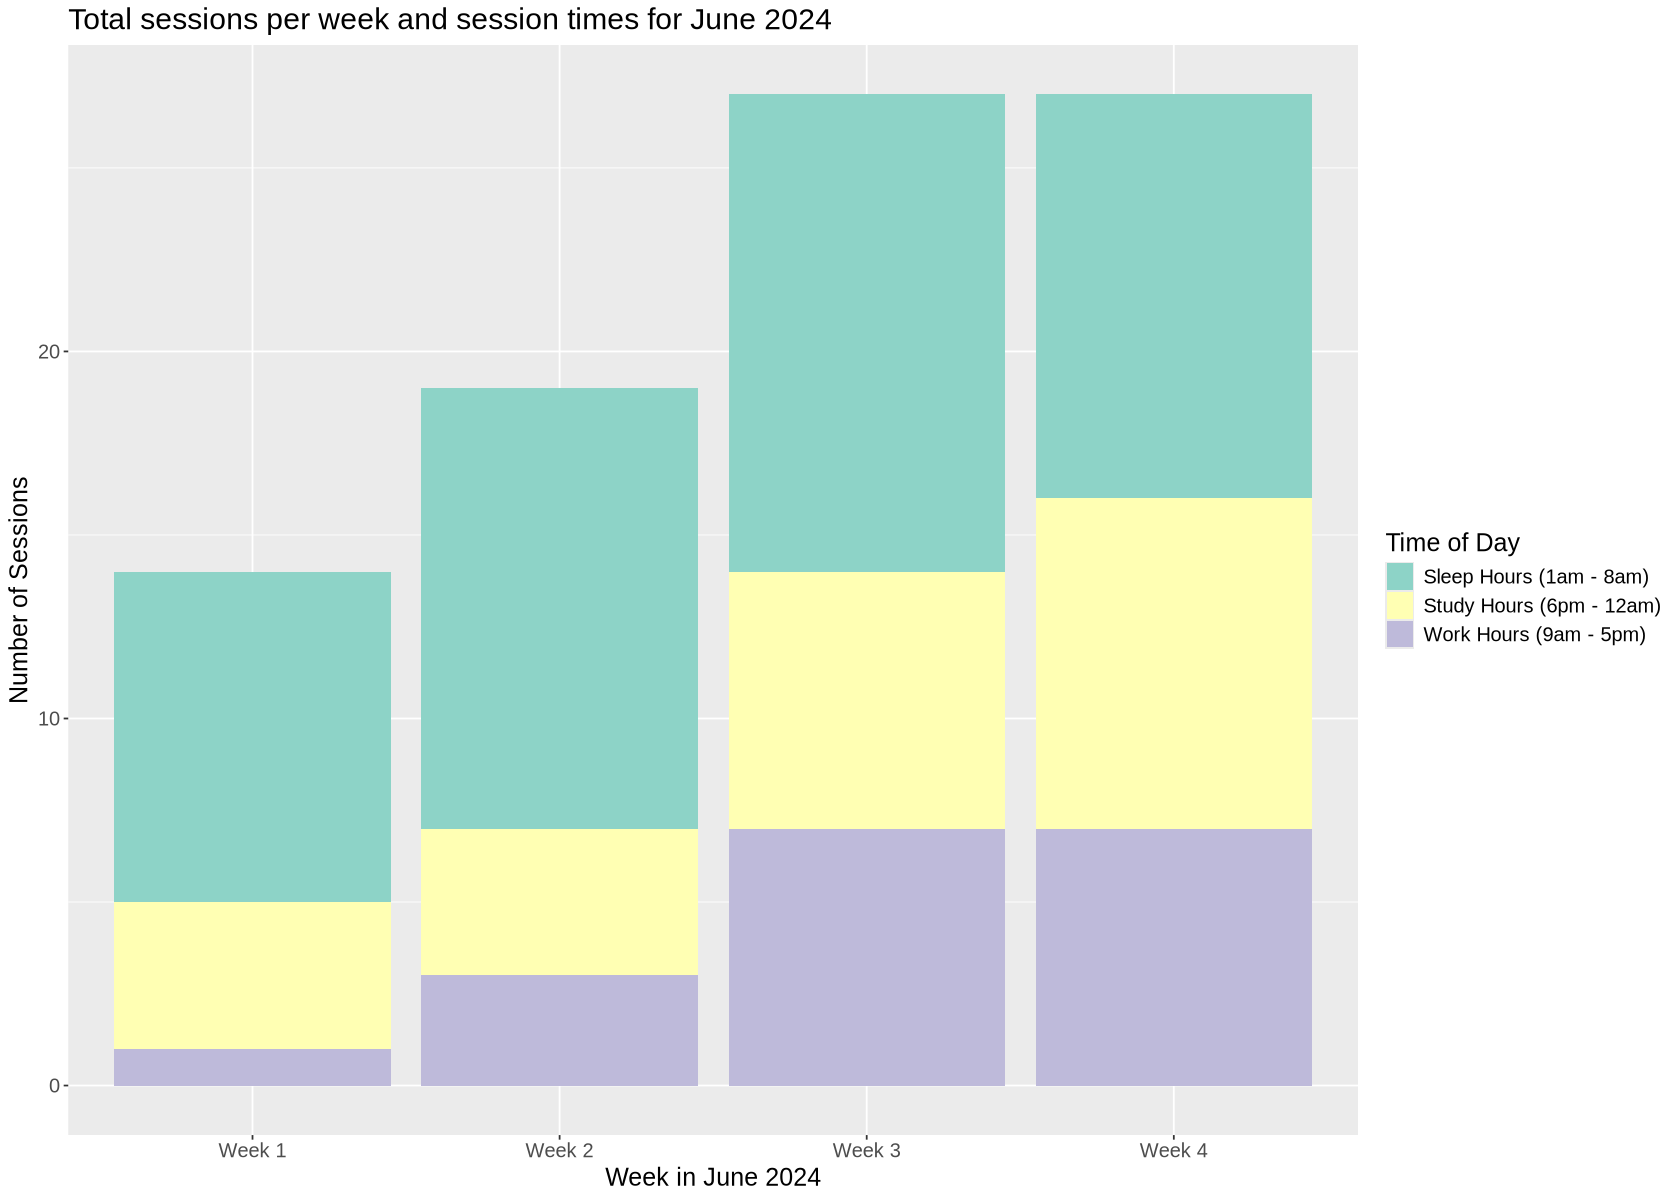

In [41]:
options(repr.plot.width = 14, repr.plot.height = 10)

weekly_sessions_plot <- sessions_per_hour |> #Graphs the total weekly sessions and their distribution by time of day
    ggplot(aes(x = week, y = count, fill = time_of_day)) +
    geom_bar(stat = "identity") +
    scale_fill_brewer(name = "Time of Day", palette = "Set3", 
                      labels = c("sleep_hours" = "Sleep Hours (1am - 8am)", 
                                 "work_hours" = "Work Hours (9am - 5pm)",
                                 "study_hours" = "Study Hours (6pm - 12am)")) +
    labs(x = "Week in June 2024", y = "Number of Sessions", fill = "Time of Day") +
    ggtitle("Total sessions per week and session times for June 2024") +
    theme(text = element_text(size = 15))
           
weekly_sessions_plot

#### The visualization above indicates that Week 3 and Week 4 in June had the same number of sessions. The greatest number of sessions occurred during sleep and study hours. 

# Methods and Plan

I will use bootstrapping inference to estimate a plausible range for university student session start times. This method was chosen because it doesn’t require a specific data distribution and works well with time-based trends. This method assumes that the player data reflects the broader university population. If the data is biased, bootstrapping may not accurately model the university student population. The bootstrapping process involves sampling with replacement from the original data to calculate average start times which generate a distribution. A 95% percentile bootstrap confidence interval can then be calculated to determine the typical session start time. No cross-validation is required. 

